## Get P/E Ratio from Yahoo Finance
yfinance (v0.2.3) is a third-party library that helps you download historical market data from Yahoo! finance.


In [ ]:
import yfinance as yf #YFinance version 0.2.3
import pandas as pd
# Get earnings
ticker='AMZN'
symbol=yf.Ticker(ticker)
dfq=symbol.get_earnings_dates(limit=100)
dfq=dfq.drop(['Surprise(%)'],axis=1).reset_index()
dfq.columns = ['Date','EPS Estimate','Reported EPS']

# Clean data
dfq['Date'] = dfq['Date'].apply(lambda x: pd.to_datetime(x.strftime('%Y-%m-%d') , infer_datetime_format=True))
dfq['Surprise %'] = (-1+dfq['Reported EPS']/dfq['EPS Estimate'])*100
dfq = dfq[['Date','EPS Estimate','Reported EPS','Surprise %']]
dfq = dfq.sort_values(by=['Date'] ,ascending=True)
dfq = dfq.drop_duplicates('Date', 'last' )
dfq=dfq.dropna()
datesQ=dfq.Date
dfq=dfq.set_index('Date')

# Download dai ly price data
dfd=yf.download(ticker,start=datesQ.iloc[0], auto_adjust=False)

# Join quarterly and dai ly data
dfj=pd.merge(dfd,dfq, on='Date' ,how='left').ffill()

# Create column P/E
dfj['P/E']=dfj['Adj Close']/dfj['Reported EPS']



Text(0, 0.5, 'P/E Ratio')

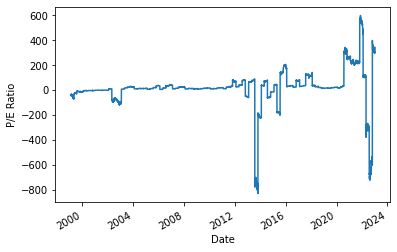

In [2]:
# Plot P/E
ax=dfj['P/E'] . plot()
ax.set_ylabel('P/E Ratio')